# EDS 220 Fall 2022
# Data quality control and outliers: 1D time series

(exercise adapted from [Use Data online textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/))

Dealing with data quality issues is an inevitable feature of working with any kind of data, and environmental data is no exception. We'll make a start at learning about these issues using simple one-dimensional time series information, before working up to more complex datasets.

Our example will be the precipitation during 2013 in Boulder, Colorado. This city is located on the eastern edge of the Rocky Mountains, and experiences lots of interesting weather as a result. In 2013, an unusual weather pattern led to some of the most intense precipitation ever recorded in the region, causing devastating floods throughout the Colorado Front Range.

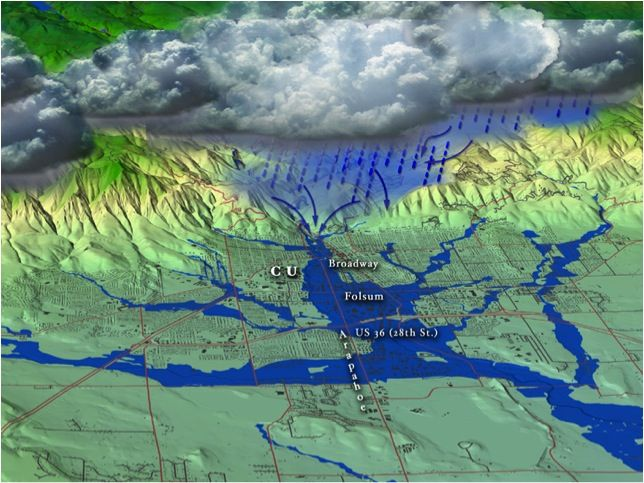

(image: Boulder, CO 100-year floodplain. "CU" = University of Colorado at Boulder)


### 1) Read in data using Pandas

Precipitation data from the [NOAA Climate Data Online](https://www.ncdc.noaa.gov/cdo-web/) service has been downloaded into the class repository (`Precip_BoulderCO_COOPstation.csv`). This file contains hourly precipitation averages calculated from a weather station in Boulder, and will be read in using Pandas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The chunk below reads in the CSV-formatted data file and converts it into a Pandas data frame:

In [3]:
# Read in data file into a Pandas data frame
dat = pd.read_csv('805325-precip-daily-2003-2013.csv')

Now that the data have been read in, we can take a look at some basic information using the `.head()` command:

In [4]:
# Display header information for data frame
dat.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


You can also get an idea of what's going on with an individual data file using the `describe` function:

In [5]:
# Describe HPCP data
dat['HPCP'].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

Then to plot the data, we can use the usual Matplotlib commands. 

It will make life easier if we first convert the units of time in the data frame to something that Pandas understands: we can use `pd.to_datetime()` to force the date information to [use the Pandas datetime format](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

Now let's see what the data look like!

(0, 1.5)

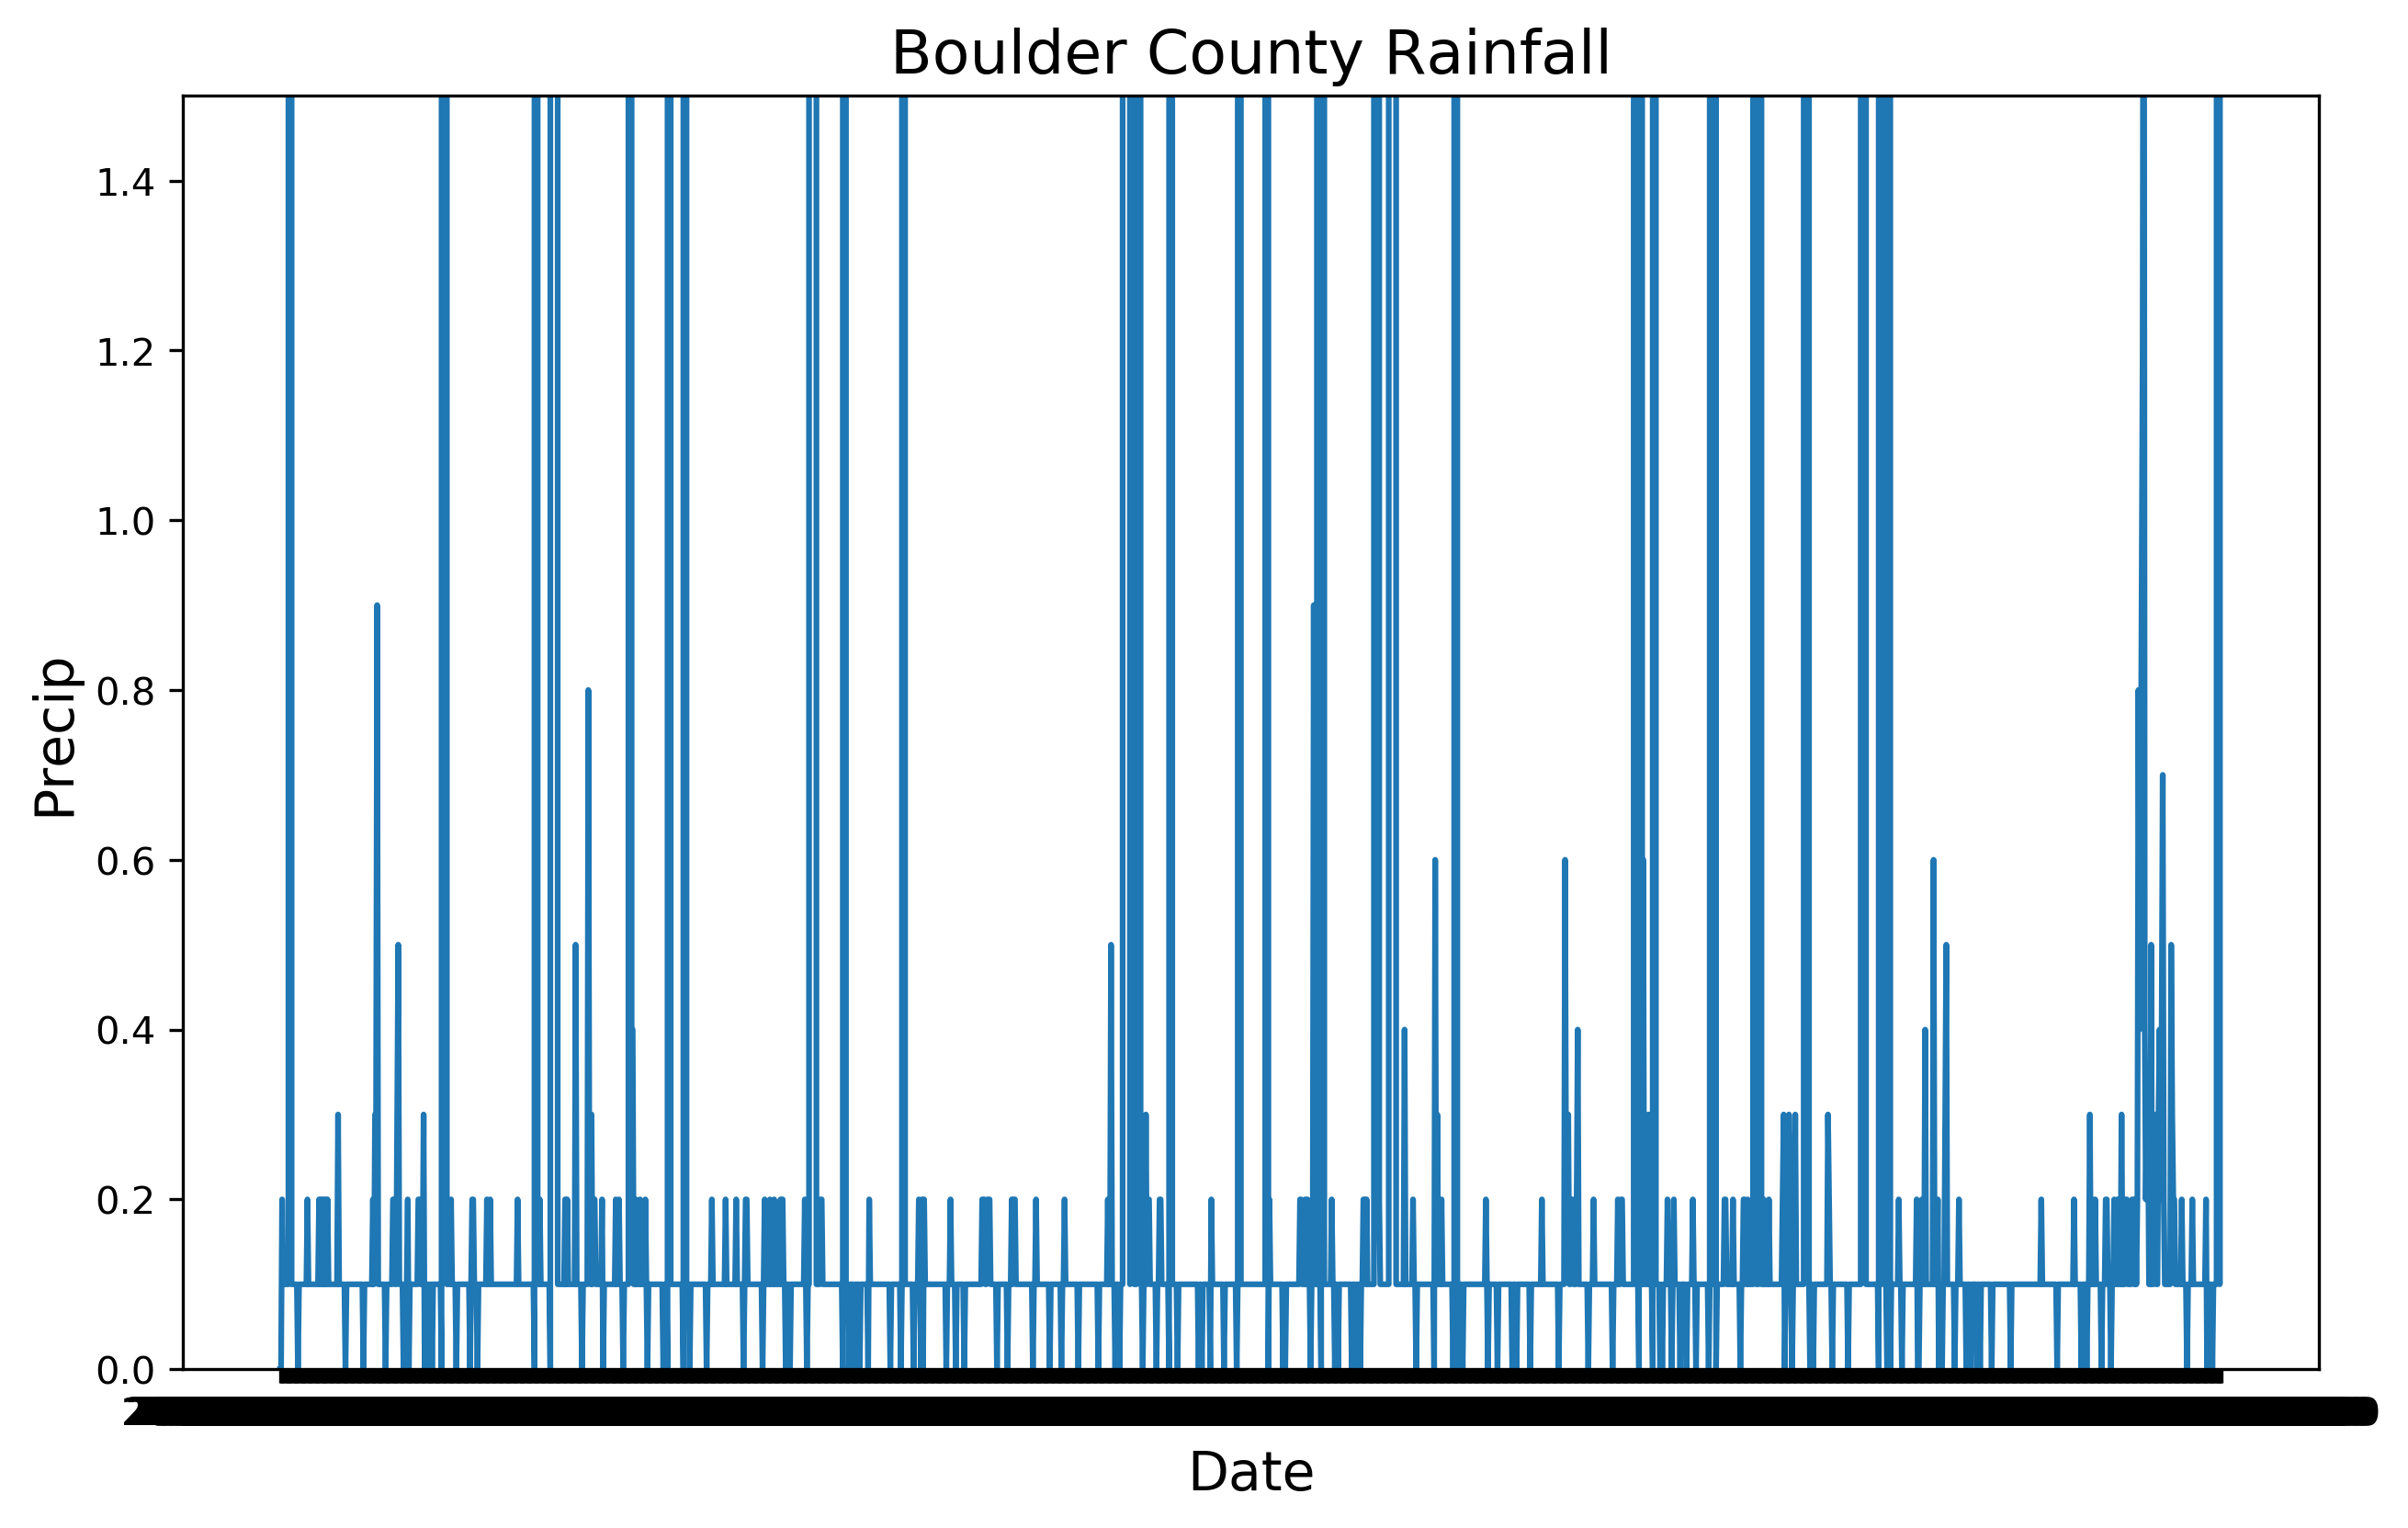

In [18]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
plt.plot(dat['DATE'],dat['HPCP'])   
# add title
plt.title('Boulder County Rainfall', fontsize=16)
# add x and y labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip', fontsize=14)
# set y limit
plt.ylim(0, 1.5)

The plot above looks.... a little messy. That's ok! and very normal for environmental datasets. By studying the _metadata_, we can get a sense of where some of the weird features might be coming from.

### 2) Look through metadata

Take a few minutes to look through the metadata fields, both from the output above and from the data description file in the class repository (PRECIP_HLY_documentation.pdf).

Try to determine:
- The units of precipitation
- What the different measurement and quality fields indicate
- How missing data are indicated

### 3) Clean up missing data

Now we just need to make some decisions about how to clean things up. Based on our reviewing of the metadata and data description, we can eliminate some of the missing data to make the plot appear cleaner. This can be accomplished by defining the `na.values` parameter when the data is read in:

In [21]:
# Read in data, specifying value for missing data
dat = pd.read_csv('805325-precip-daily-2003-2013.csv', na_values=[999.99]) 

Rerunning the `head` command will show us what this did!

In [22]:
dat.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


Now we can replot the data to see what the missing-values masking does to its appearance:

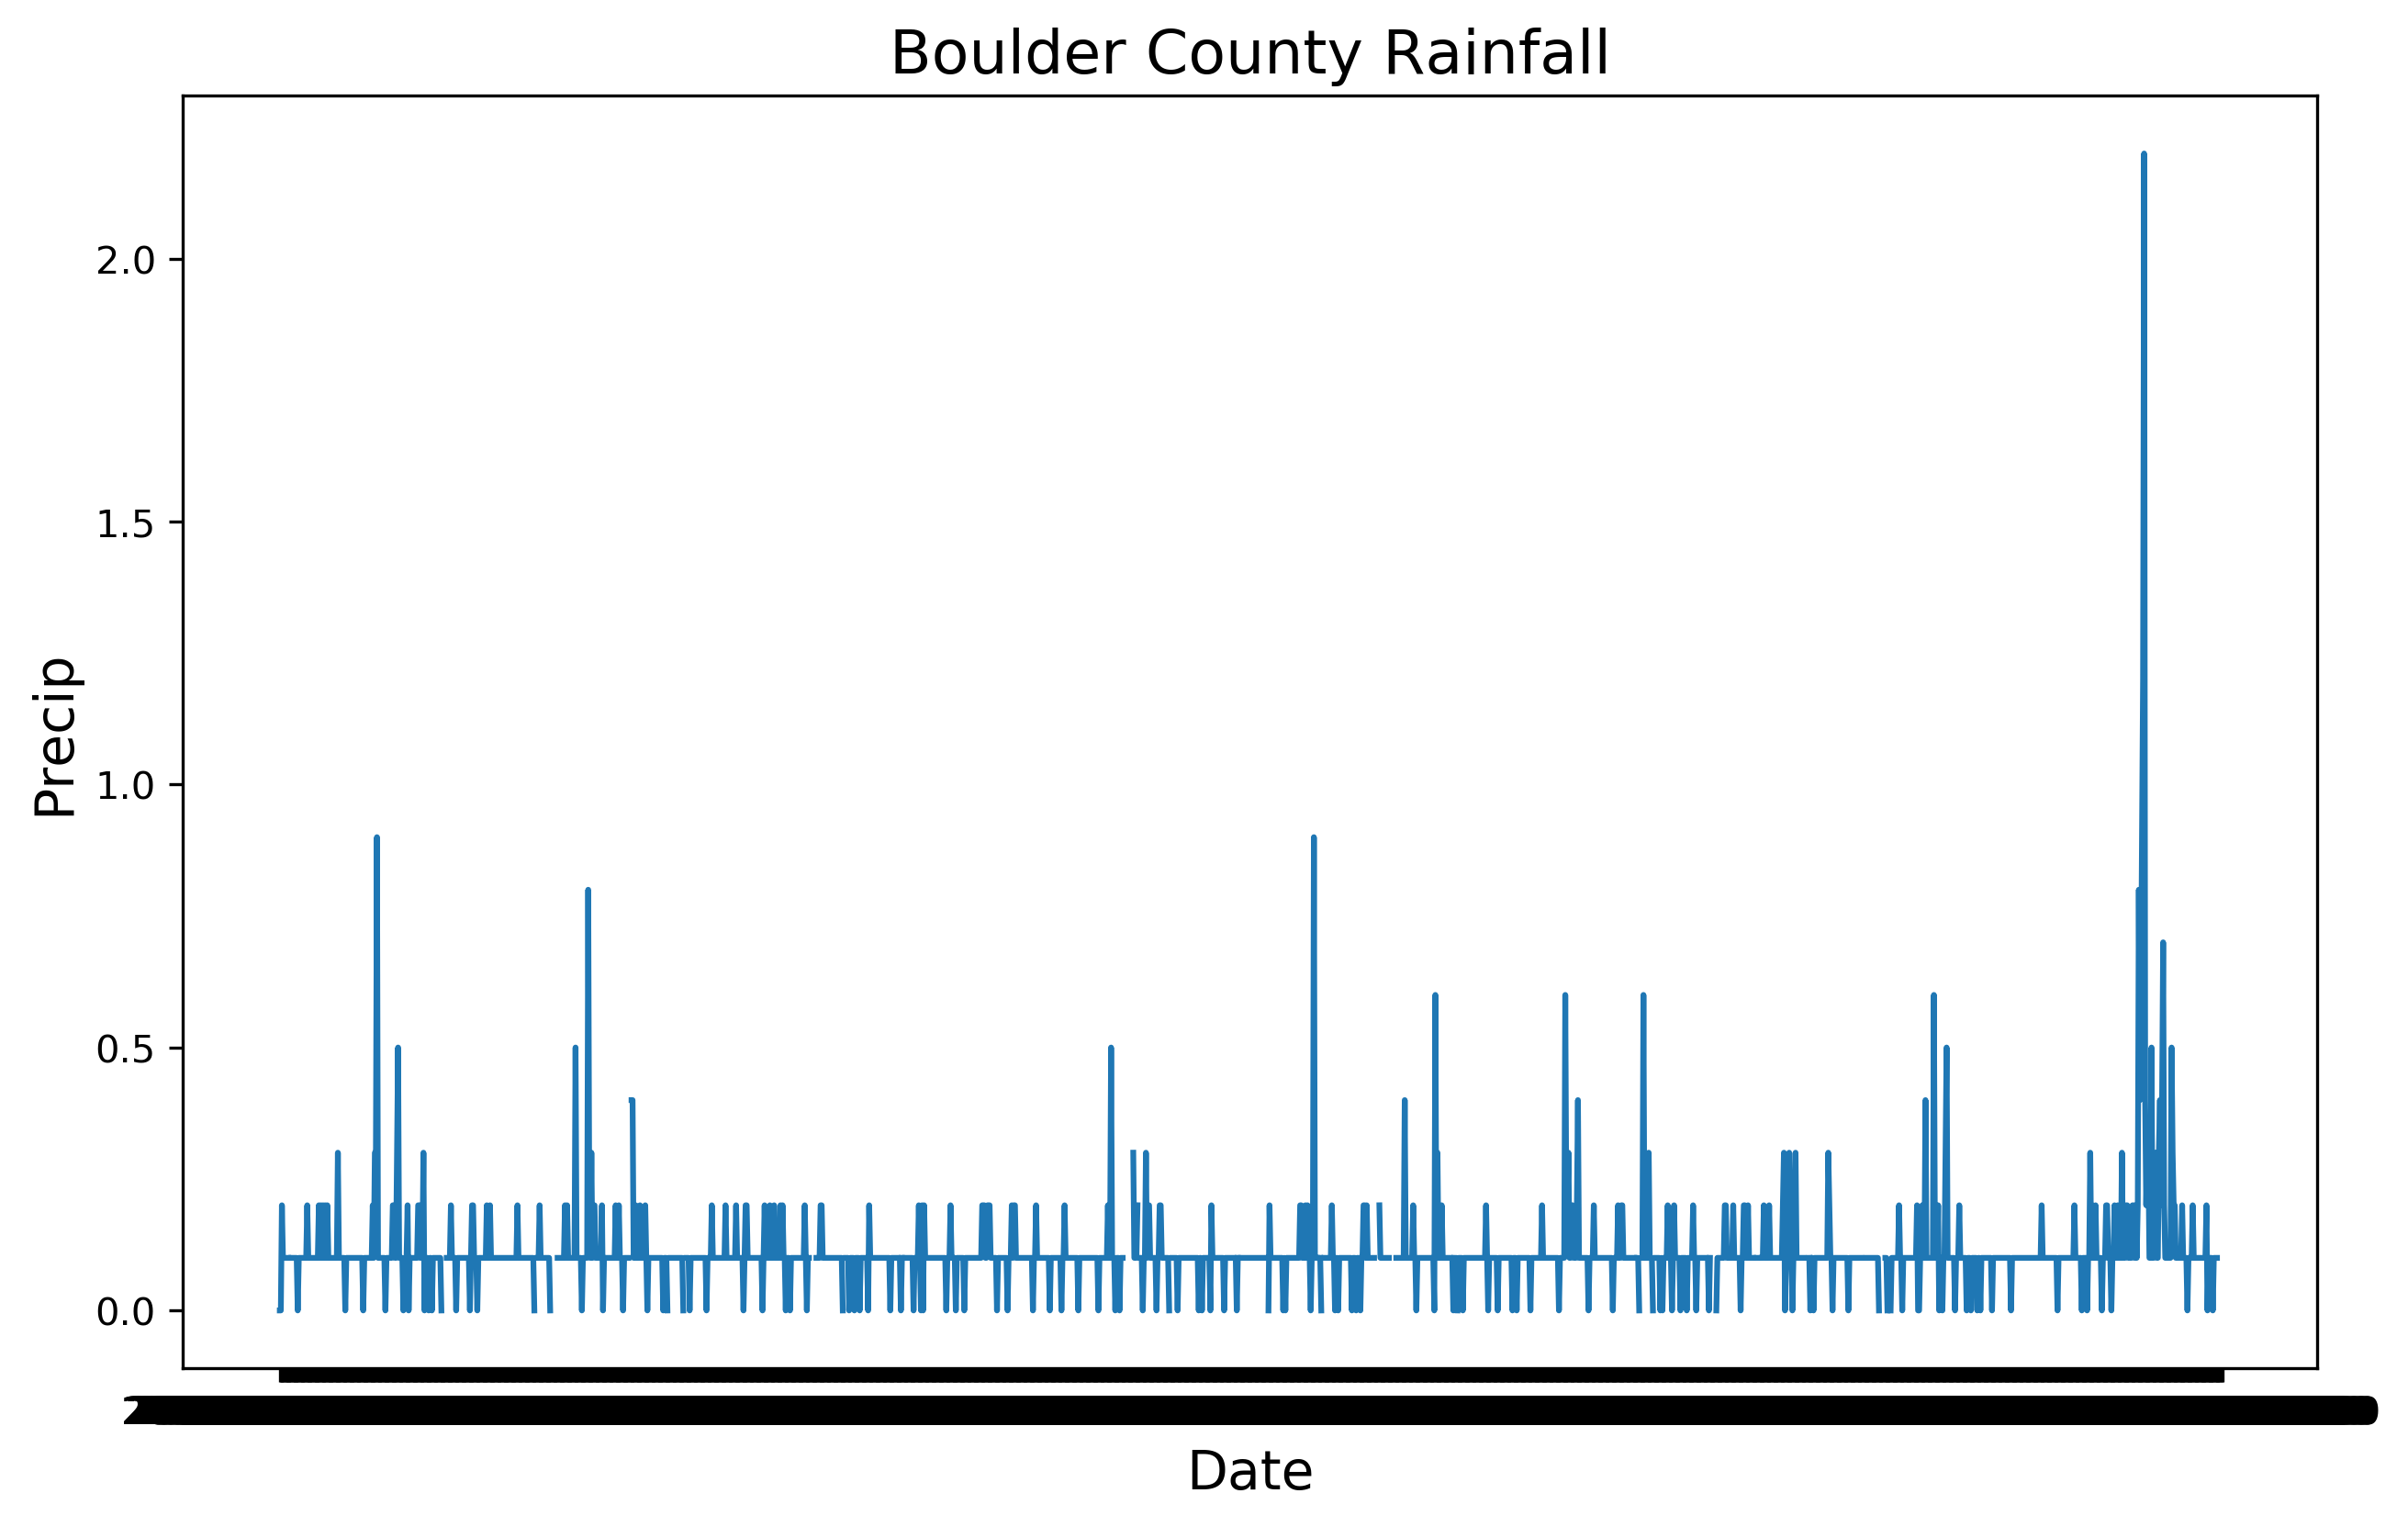

In [24]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
plt.plot(dat['DATE'],dat['HPCP'])   
# add title
plt.title('Boulder County Rainfall', fontsize=16)
# add x and y labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip', fontsize=14)
# set y limit
#plt.ylim(0, 1.5)
plt.show()


It's an improvement! The extremely large (999.99) values are now gone, making the axis limits more reasonable. 

### 4) Update date formatting

Although our plot now looks better, you'll probably notice that the x-axis labels look funny: this is a sign that something may be up with the formatting of the dates. 

We can improve the plot further by changing the `DATE` information to the Pandas `datetime` format, using `.to_datetime`:

In [26]:
# Convert date to Pandas datetime
dat.index=pd.to_datetime(dat.index)

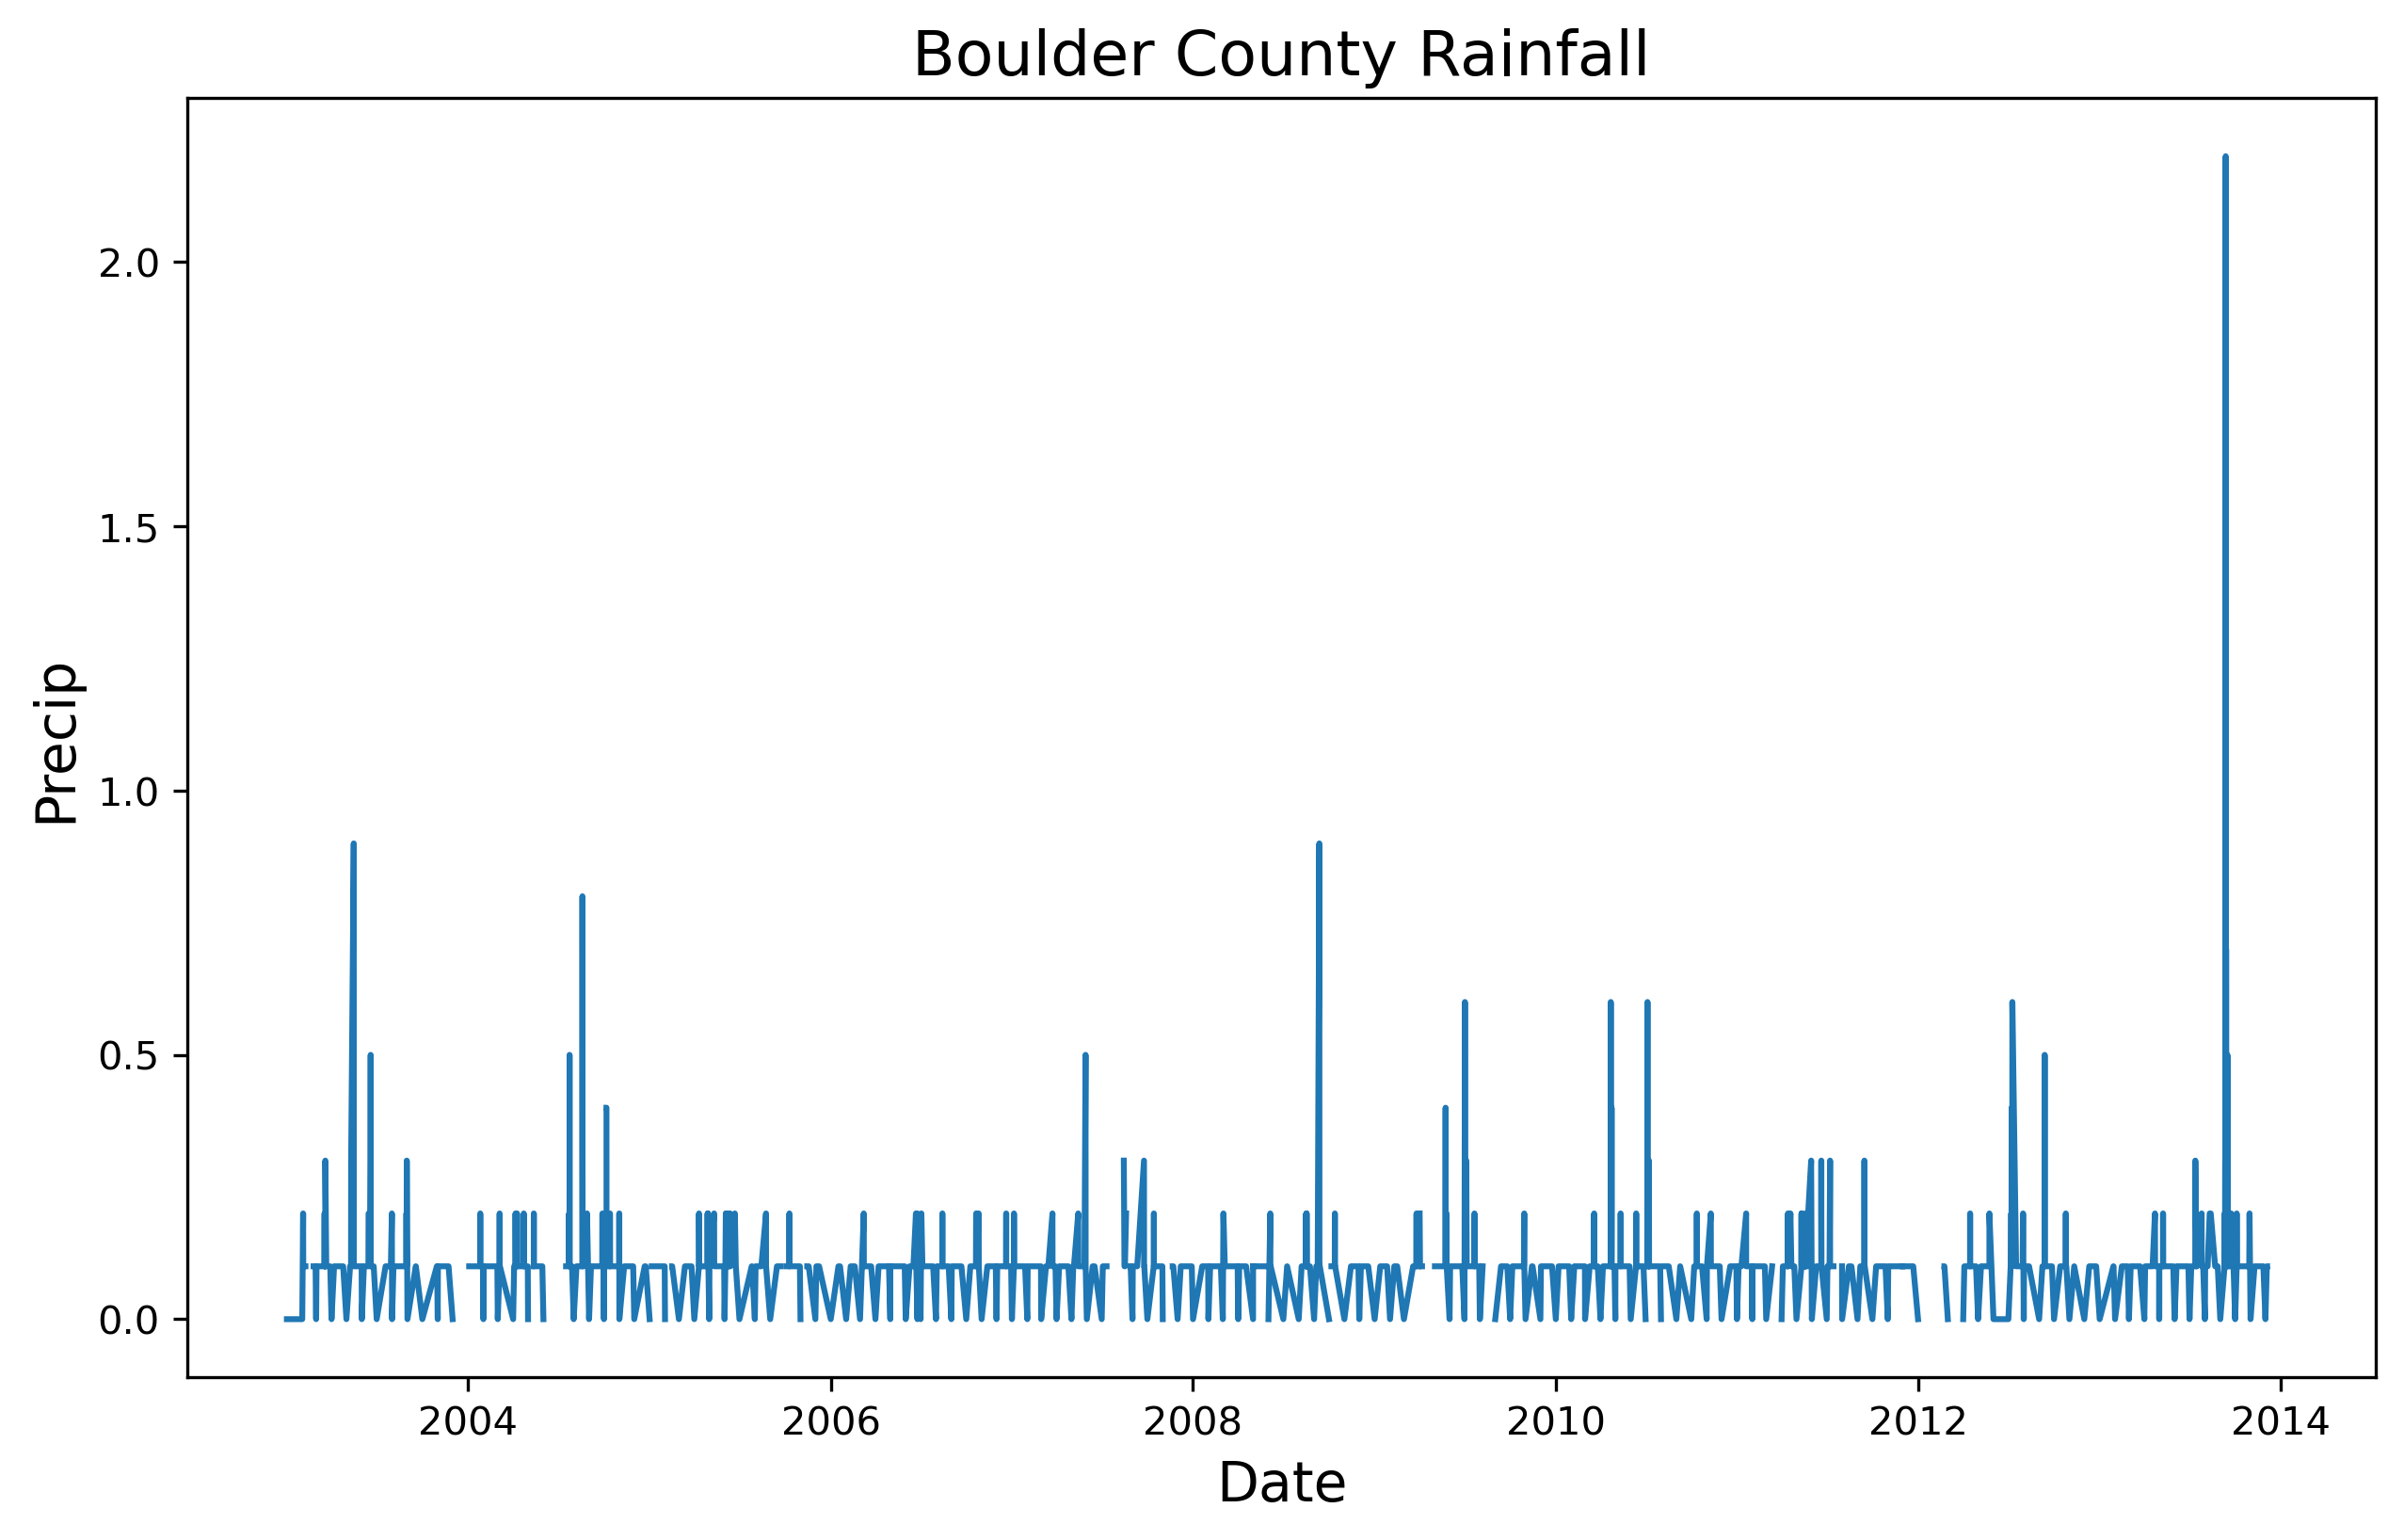

In [31]:
# Replot with datetime-formatted date information
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot

# add title

# add x and y labels

# set y limit


Now that Python sees a date format it recognizes within Matplotlib, the axis labels become much more legible! 

Next, we're going to want to do some subsampling and aggregation of the data. To do this, it's a lot easier if the `DATE` column is an __index__ column; this is a special type of data column within Pandas that lets Python know that the date is the coordinate along which data will be manipulated.

The definition of an index column gets set during the process of reading in the data into a Pandas dataframe, so we'll need to redo that step:

In [29]:
# Read in data, specifying value for missing data AND which column is the index
dat = pd.read_csv('805325-precip-daily-2003-2013.csv', na_values=[999.99], index_col=['DATE']) 

Since we've now re-read in the data, we also need to redo the conversion of the date column to a Pandas datetime format. But now that `DATE` is an index rather than a normal variable, the syntax is slightly different:

In [30]:
# Convert date to Pandas DateTimeIndex
dat.index=pd.to_datetime(dat.index)

The index column will allow us to very easily perform either subsetting (selecting a portion of the data) or resampling (averaging the data over time periods other than the daily native resolution).

Let's try a couple of examples!

#### a) Resampling

Pandas has built-in codes it understands to do different types of time-based resampling:
- M = month
- Y = year
- D = day

among others. Additional information can be found in the [.resample() documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [32]:
# Resample data to monthly resolution, report the monthly AVERAGE
dat_monthly = dat.resample('M').mean()

The new data look quite different when they are plotted!

Text(0, 0.5, 'Precip')

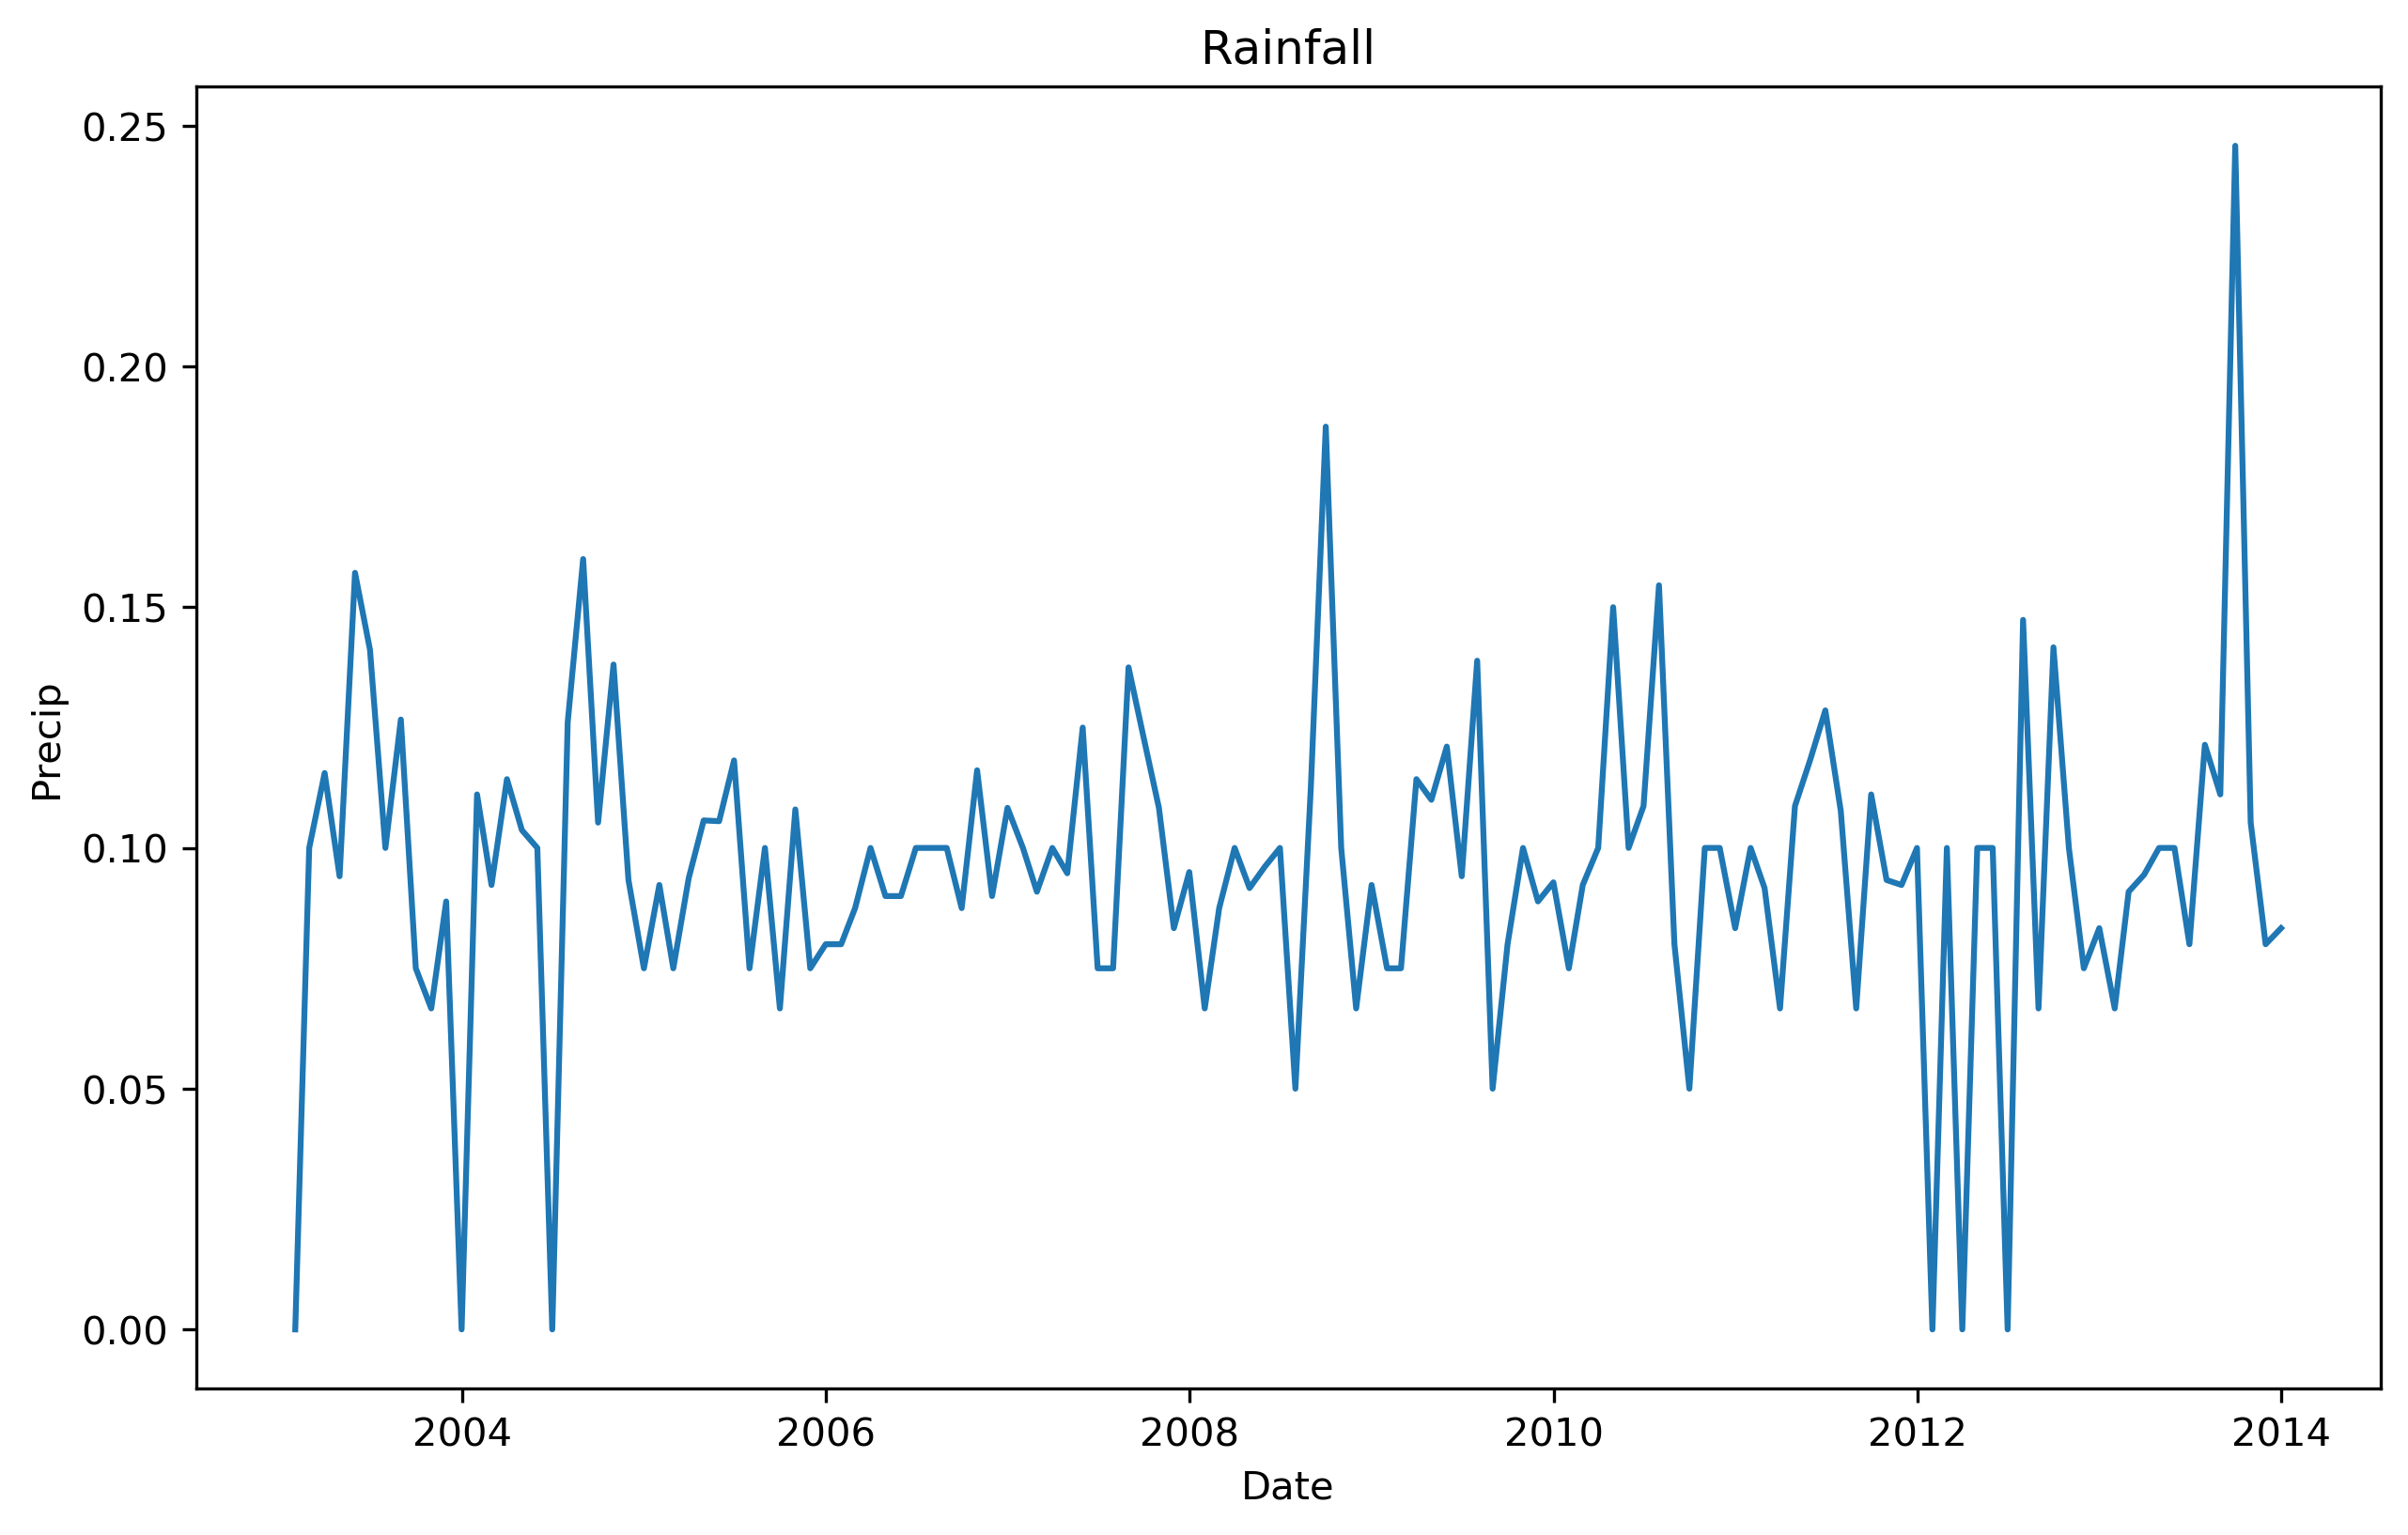

In [35]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
plt.plot(dat_monthly.index, dat_monthly['HPCP'])
# add title
plt.title('Rainfall')
# add x and y labels
plt.xlabel('Date')
plt.ylabel('Precip')


#### b) Subsetting

Sometimes, we're not interested in looking at the entire dataset, but only a subset of that information.

__Why might this be??__

In these cases, we can easily subsample a Pandas dataframe to get only the portion of interest: since `DATE` is set up as our index variable already, Pandas will assume that the inputs you give it correspond to dates. 

In [55]:
# Extract only precipitation data for 2013


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-01-28 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-01-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-02-14 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


Text(0, 0.5, 'Precip')

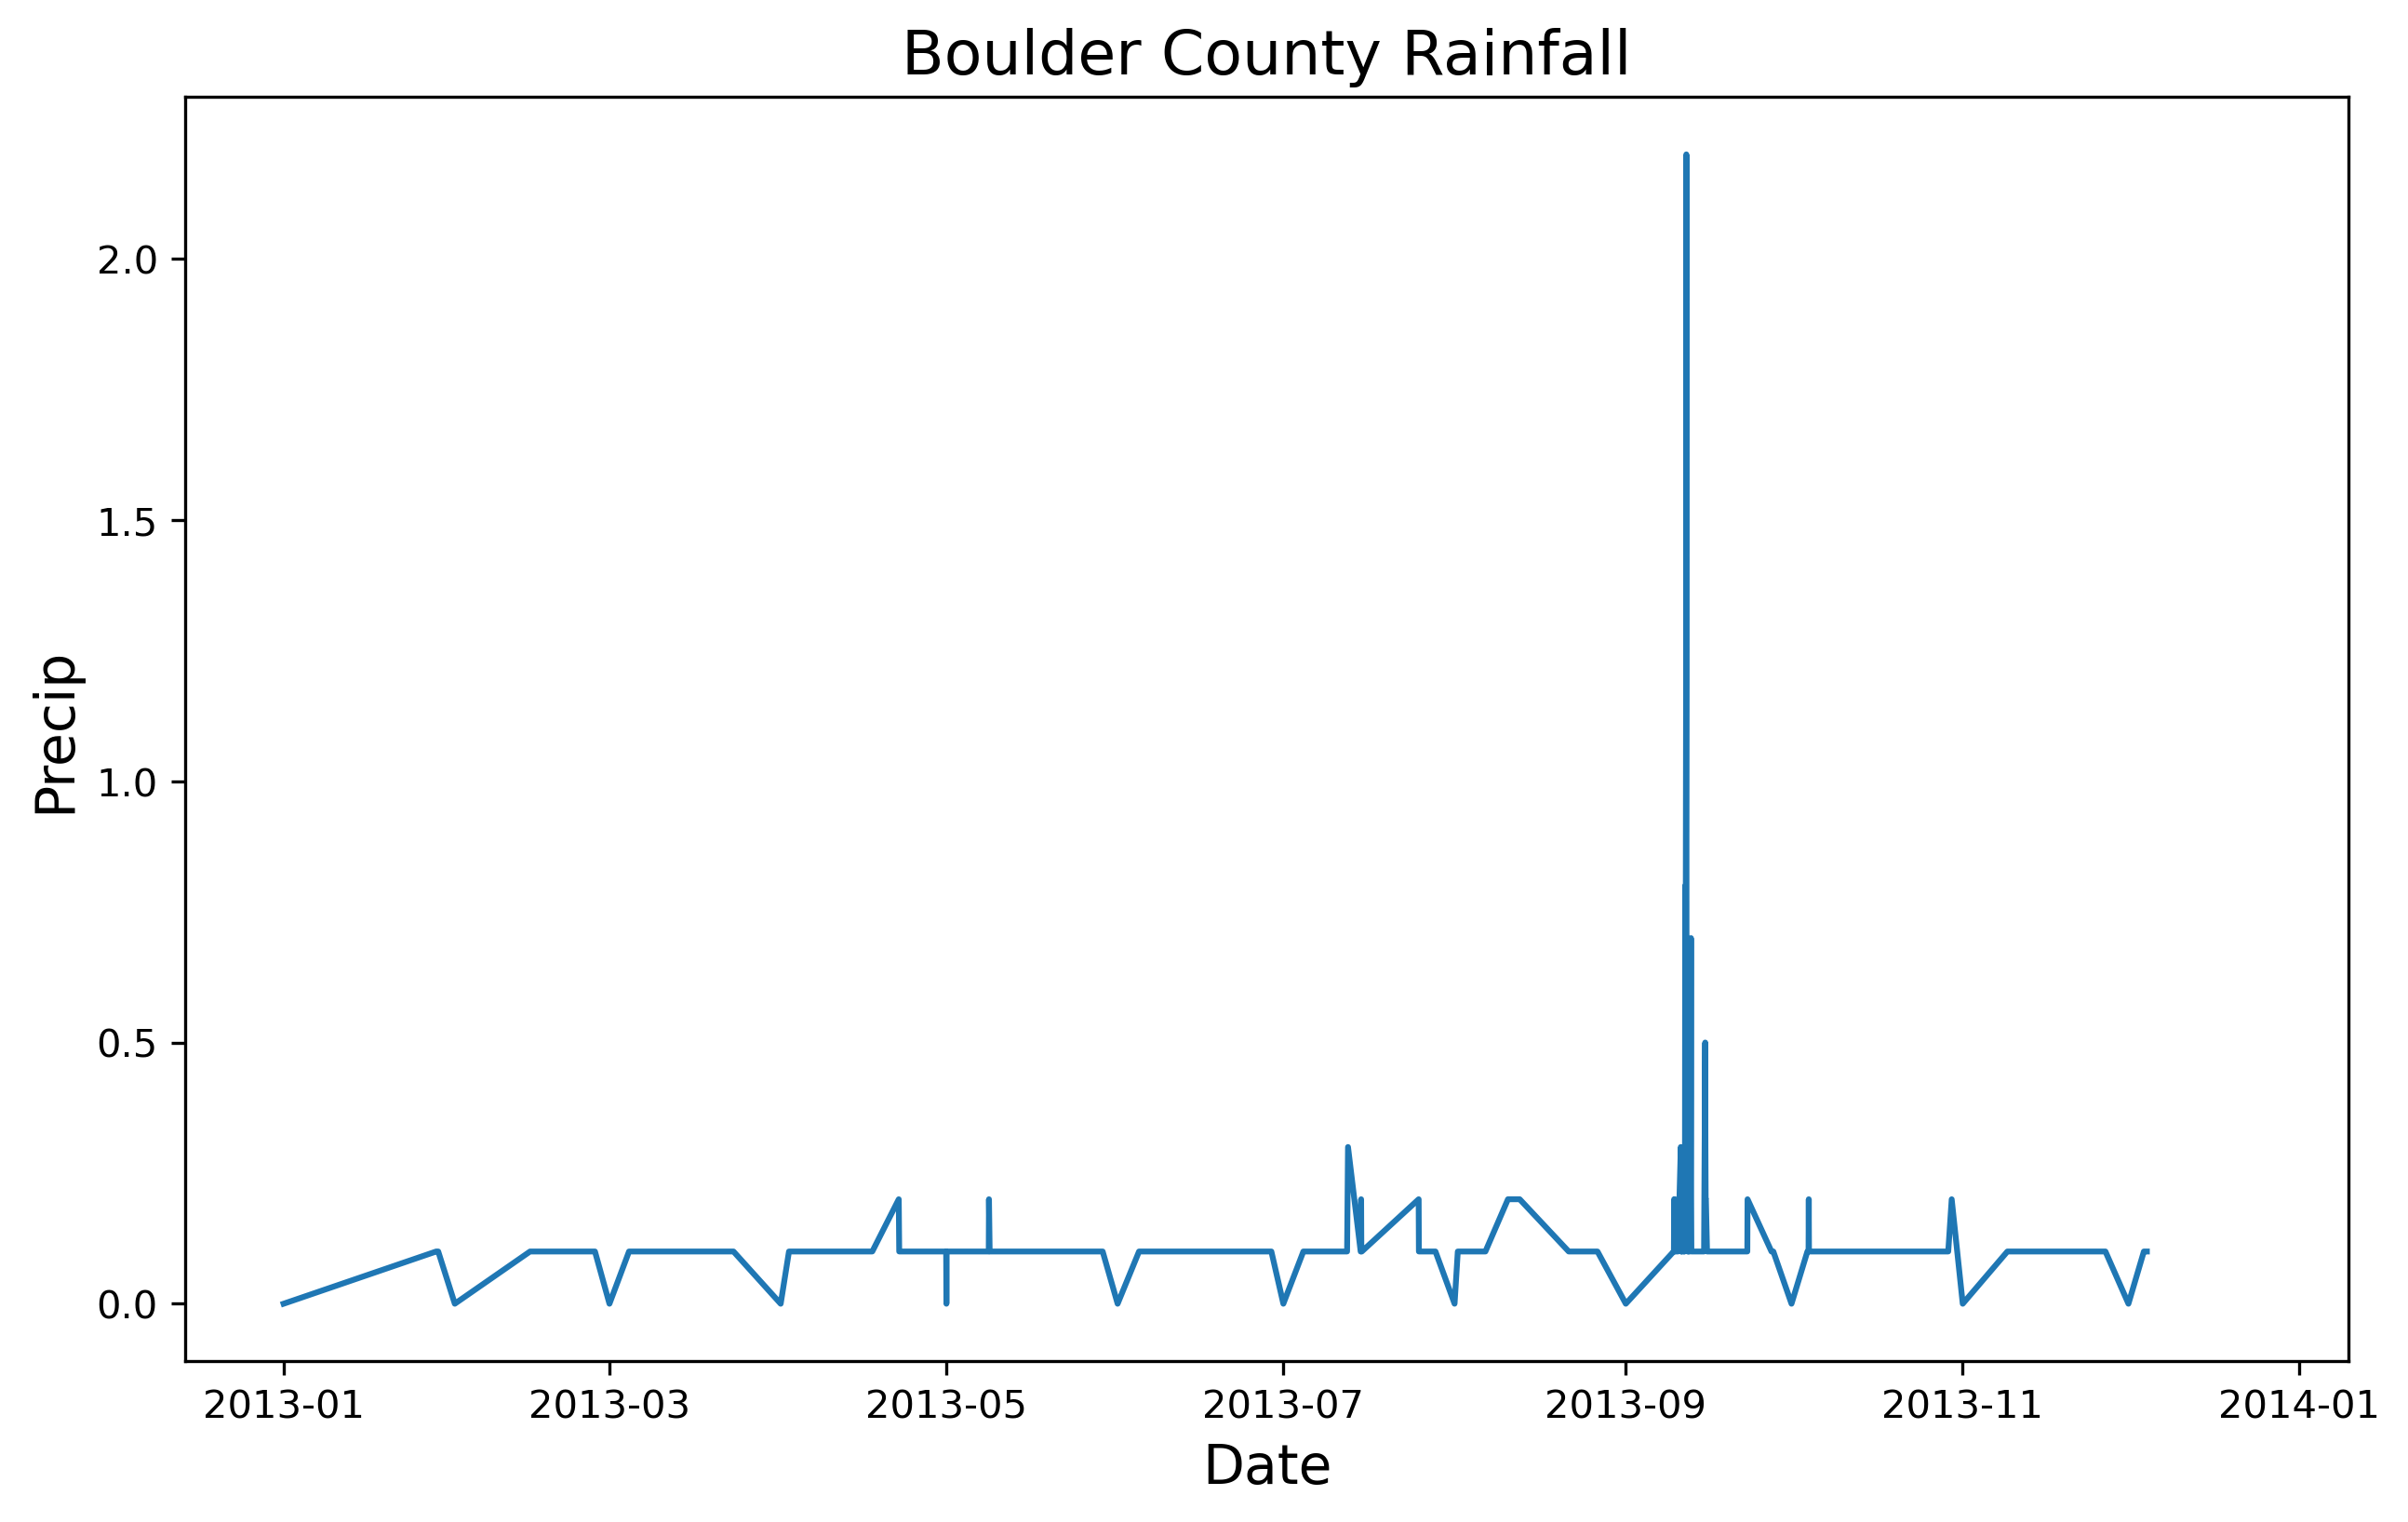

In [56]:
# create a new figure, set size and resolution (dpi)
plt.figure(figsize=(10, 6), dpi=300)    
# add data to the plot
  
# add title

# add x and y labels
